<a href="https://colab.research.google.com/github/Saumitra-Shukla/Qeats/blob/master/s2t_intern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # **Entering sample data from kaggle*

---


In [8]:
!ls -lh --block-size=MB

total 1122MB
-rw-r--r-- 1 root root    1MB Jan 29 00:03 kaggle.json
-rw-r--r-- 1 root root    1MB Jan 29 00:11 null1
drwxr-xr-x 1 root root    1MB Jan 13 16:38 sample_data
drwxr-xr-x 3 root root    1MB Jan 29 00:10 train
-rw-r--r-- 1 root root 1122MB Jan 29 00:09 train.7z


In [0]:
ls train/train/audio

In [0]:
!rm -rf null2
!rm -rf null1

In [0]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle

In [0]:
from google.colab import files
files.upload()

In [0]:
!cp kaggle.json ~/.kaggle/

In [0]:
!kaggle competitions download -c tensorflow-speech-recognition-challenge -f train.7z

In [0]:
!mkdir train
!7z x train.7z -otrain/ * -r > null1

'''
!mkdir test
!7z x test.7z -otest/ * -r > null2
'''

In [0]:
!7z x test.7z -otest/ * -r

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

# **Data preprocessing**

In [0]:
import os
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn.model_selection import train_test_split


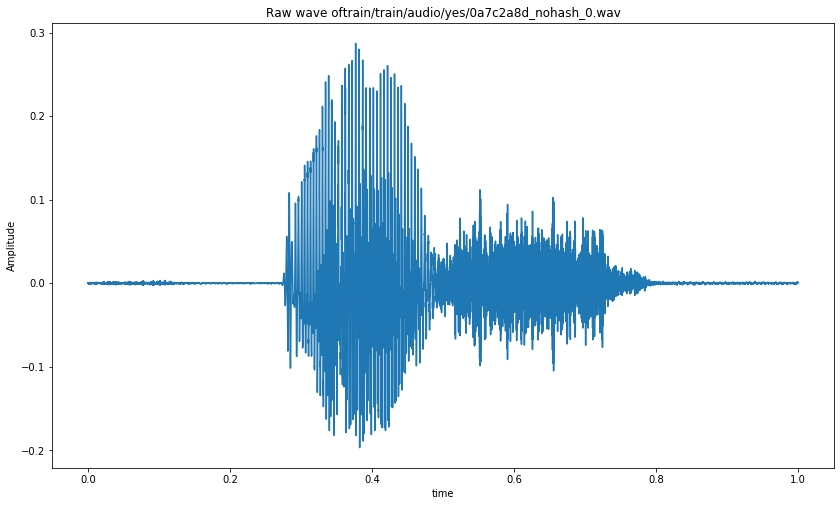

In [124]:
sample0,sample0_rate=librosa.load('train/train/audio/yes/0a7c2a8d_nohash_0.wav',sr=16000)
fig=plt.figure(figsize=(14,18))
ax1=fig.add_subplot(211)
ax1.set_title('Raw wave of'+'train/train/audio/yes/0a7c2a8d_nohash_0.wav')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0,sample0_rate/len(sample0),sample0_rate),sample0)

In [13]:
waves_array=[]
label_array=[]
labels=["up","down","left","right","yes","no","stop","go","on","off"]
for l in labels:
  print(l)
  waves=[f for f in os.listdir('train/train/audio/'+l) if f.endswith('.wav')]
  for w in waves:
    s,srate=librosa.load('train/train/audio/'+l+'/'+w,sr=16000)
    s=librosa.resample(s,srate,8000)

    if len(s)==8000:
      waves_array.append(s)
      label_array.append(l)

up
down
left
right
yes
no
stop
go
on
off


In [0]:
le = LabelEncoder()
y=le.fit_transform(label_array)
classes= list(le.classes_)

y=np_utils.to_categorical(y, num_classes=len(labels))

waves_array = np.array(waves_array).reshape(-1,8000,1)

x_tr, x_val, y_tr, y_val = train_test_split(np.array(waves_array),np.array(y),stratify=y,test_size = 0.2,random_state=777,shuffle=True)

In [54]:
print(len(x_tr))

17049


In [0]:
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D, TimeDistributed,GRU,Activation
#from keras.engine.base_layer import wrapped_fn()
from keras.models import Sequential
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
K.clear_session()
import random


In [74]:
inputs = Input(shape=(8000,1))

#First Conv1D layer
conv = Conv1D(8,13, padding='valid', activation='relu', strides=1)(inputs)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Second Conv1D layer
conv = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Third Conv1D layer
conv = Conv1D(32, 9, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Fourth Conv1D layer
conv = Conv1D(64, 7, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Flatten layer
conv = Flatten()(conv)

#Dense Layer 1
conv = Dense(256, activation='relu')(conv)
conv = Dropout(0.3)(conv)

#Dense Layer 2
conv = Dense(128, activation='relu')(conv)
conv = Dropout(0.3)(conv)

outputs = Dense(len(labels), activation='softmax')(conv)

model = Model(inputs, outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 8000, 1)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 7988, 8)           112       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2662, 8)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2662, 8)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 2652, 16)          1424      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 884, 16)           0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 884, 16)           0   

In [0]:
files.upload()

In [70]:
from keras.models import load_model
model=load_model('model1.h5')
model.summary()
type(model)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 11, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 14, 32)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 12, 64)         18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

keras.engine.sequential.Sequential

In [0]:
#model.layers.pop()
model.layers.pop()
model.add(Dense(10,name="dense_added",activation='softmax'))
#model.add(Activation('softmax'))



In [0]:
inputs = Input(shape=(8000,1))

layers = [l for l in model.layers]
new_conv = Conv2D(filters=640,kernel_size=(5, 5),name='new_conv',padding='same')(layers[0].output)

x = new_conv
for i in range(3, len(layers)):
    layers[i].trainable = False
    x = layers[i](x)

result_model = Model(input=inputs, output=x)
result_model.summary()

In [73]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 11, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 14, 32)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 12, 64)         18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 multiple                  0         
_________________________________________________________________
dropout_1 (Dropout)          multiple                  0         
_________________________________________________________________
flatten_1 (Flatten)          multiple                  0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

In [0]:

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=10, min_delta=0.0001) 
mc = ModelCheckpoint('best_model_s2t.hdf5', monitor='val_acc', verbose=0, save_best_only=True, mode='max')

history=model.fit(x_tr, y_tr ,epochs=100, callbacks=[es,mc], batch_size=32, validation_data=(x_val,y_val))

!cp best_model_s2t.hdf5 drive/'My Drive'/machine-learning/weights/best_model_s2t.hdf5



In [0]:
!cp best_model_s2t.hdf5 gdrive/'My Drive'/machine-learning/weights/best_model_s2t.hdf5

In [122]:
!ls

best_model_s2t.hdf5  kaggle.json	null1	     train.7z
down.wav	     model1.h5		sample_data  yes.wav
gdrive		     new_sound_unn.wav	train


In [79]:
model=load_model('best_model_s2t.hdf5')
def predict(audio):
    prob=model.predict(audio.reshape(1,8000,1))
    index=np.argmax(prob[0])
    return classes[index]


i=random.randint(0,len(x_val)-1)
samp=x_val[i].ravel()
print("Audio:",classes[np.argmax(y_val[i])])
ipd.Audio(samp, rate=8000)
print("Text:",predict(samp))

Audio: no
Text: no


**Did not work on colab so recorded it offline and then uploaded**

In [0]:
!pip install sounddevice
!pip install soundfile

In [87]:
!apt-get install libportaudio2
!apt-get install libasound-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libportaudio2 is already the newest version (19.6.0-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'libasound2-dev' instead of 'libasound-dev'
libasound2-dev is already the newest version (1.1.3-5ubuntu0.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.


In [86]:
import sounddevice as sd
import soundfile as sf

samplerate = 16000  
duration = 1 # seconds
filename = 'yes.wav'
print("start")
mydata = sd.rec(int(samplerate * duration), samplerate=samplerate,
    channels=1, blocking=True)
print("end")
sd.wait()
sf.write(filename, mydata, samplerate)

start


PortAudioError: ignored

In [115]:
files.upload()

Saving yes.wav to yes.wav


{'yes.wav': b'RIFF$}\x00\x00WAVEfmt \x10\x00\x00\x00\x01\x00\x01\x00\x80>\x00\x00\x00}\x00\x00\x02\x00\x10\x00data\x00}\x00\x00\xff\xff\xff\xff\x00\x00\xff\xff\x00\x00\xff\xff\x00\x00\x00\x00\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfd\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfd\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\xfe\xff\

In [0]:
!rm -rf \'yes*

In [118]:
!ls

best_model_s2t.hdf5  kaggle.json	null1	     train.7z
down.wav	     model1.h5		sample_data  yes.wav
gdrive		     new_sound_unn.wav	train


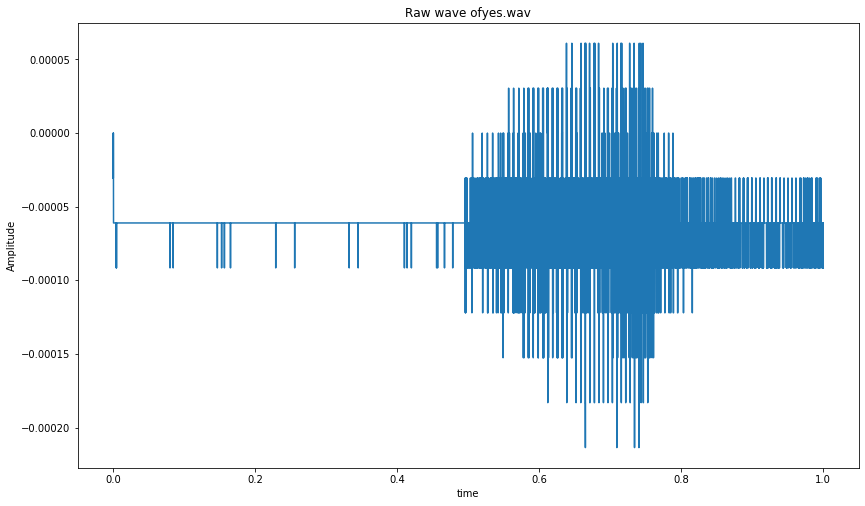

In [116]:
sample0,sample0_rate=librosa.load('yes.wav',sr=16000)
fig=plt.figure(figsize=(14,18))
ax1=fig.add_subplot(211)
ax1.set_title('Raw wave of'+'yes.wav')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0,sample0_rate/len(sample0),sample0_rate),sample0)

In [117]:
samples, sample_rate = librosa.load('yes.wav', sr = 16000)
samples = librosa.resample(samples, sample_rate, 8000)
#samples.reshape(-1,8000,1)
ipd.Audio(samples,rate=8000)
predict(samples)

'up'